In [2]:
import squarify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from ast import literal_eval

In [3]:
data = pd.read_csv("pokemon.csv")
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
data.shape

(801, 41)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


## Total Missing Values

In [6]:
print(data.isnull().sum()[data.columns[data.isnull().any()]])
print("Total Missing Values:", data.isna().sum().sum())

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64
Total Missing Values: 522


In [7]:
# Descarting unnecessary rows

data.drop(columns = ['japanese_name', 
        'pokedex_number', 'base_egg_steps', 
        'classfication', 'percentage_male'], 
        axis = 1, 
        inplace = True)

In [8]:
# type = type1 type2

data['type'] = data['type1'].astype(str) + ' ' + data['type2'].astype(str)
data[['type']]

,type
0,grass poison
1,grass poison
2,grass poison
3,fire nan
4,fire nan
...,...
796,steel flying
797,grass steel
798,dark dragon
799,psychic nan


In [9]:
data['abilities'] = data.apply(lambda x: literal_eval(x['abilities']), axis=1)
data[['abilities']]

,abilities
0,"[Overgrow, Chlorophyll]"
1,"[Overgrow, Chlorophyll]"
2,"[Overgrow, Chlorophyll]"
3,"[Blaze, Solar Power]"
4,"[Blaze, Solar Power]"
...,...
796,[Beast Boost]
797,[Beast Boost]
798,[Beast Boost]
799,[Prism Armor]


In [10]:
data['n_abilities'] = data.apply(lambda x : len(x['abilities']), axis=1)
data[['n_abilities']]

,n_abilities
0,2
1,2
2,2
3,2
4,2
...,...
796,1
797,1
798,1
799,1


### Calculating the BMI

We can use this formula to calculate the BMI: $$ BMI = \dfrac{Weight(kg)}{[Height]^2} $$

In [11]:
data['bmi']=data.apply(lambda x: x['weight_kg']/(x['height_m']**2), axis=1)
data[['bmi']]

,bmi
0,14.081633
1,13.000000
2,25.000000
3,23.611111
4,15.702479
...,...
796,11.813563
797,1.111111
798,29.355372
799,39.930556


In [12]:
data[data['capture_rate']=='30 (Meteorite)255 (Core)'][['capture_rate','name']]

,capture_rate,name
773,30 (Meteorite)255 (Core),Minior


In [13]:
data['capture_rate'].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
data['capture_rate'] = data['capture_rate'].fillna(0)
data['capture_rate'] = data['capture_rate'].astype('int')
data[['capture_rate']]

,capture_rate
0,45
1,45
2,45
3,45
4,45
...,...
796,25
797,255
798,15
799,3


## Pokemons Per Generation

[Text(0.5, 0, 'Generation'), Text(0, 0.5, 'Count')]

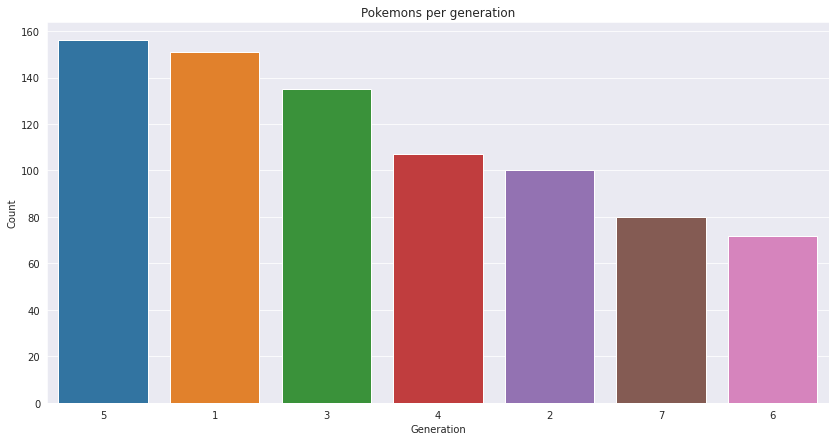

In [15]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(x = 'generation', 
                  data = data,
                  order = data['generation'].value_counts().index)

ax.set_title('Pokemons per generation')
ax.set(xlabel='Generation', ylabel='Count')

## Most prominent primary types

(0.0, 100.0, 0.0, 100.0)

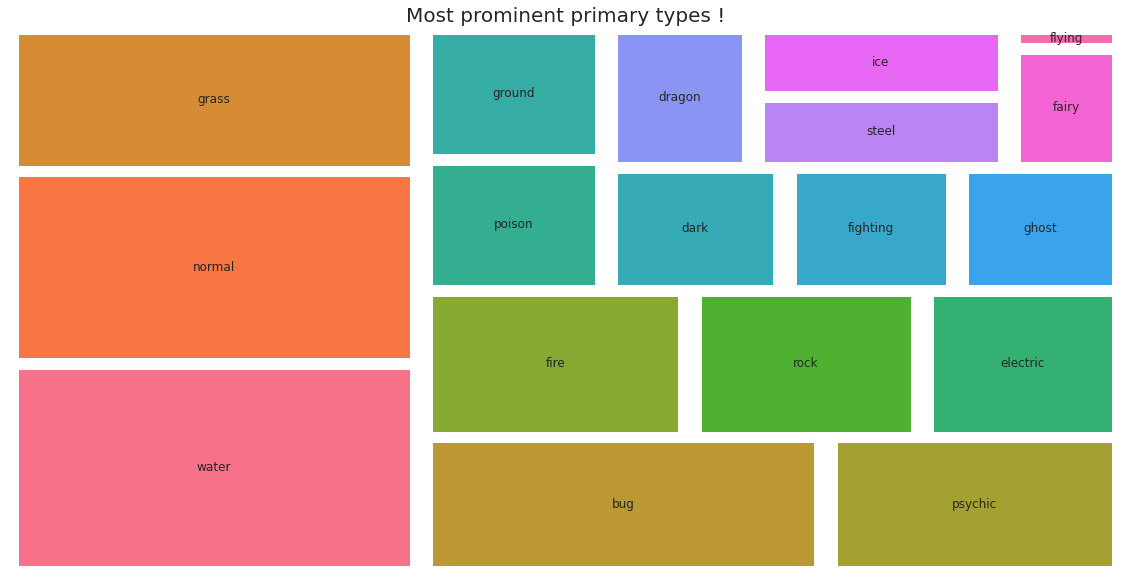

In [17]:
valc_type1 = data['type1'].value_counts()

plt.figure(figsize=(20,10))
ax = squarify.plot(valc_type1,
                  label = valc_type1.index,
                  color = sns.color_palette('husl',len(valc_type1)),
                  pad = 0.8,
                  text_kwargs = {'fontsize':12})
ax.set_title("Most prominent primary types !", size=20)
plt.axis('off')

the secons type does not have the en

In [18]:
data['type2'].isnull().sum()

384

In [19]:
valc_type2 = data['type2'].value_counts()
types_df = pd.concat([valc_type1,valc_type2],axis=1)

<AxesSubplot:>

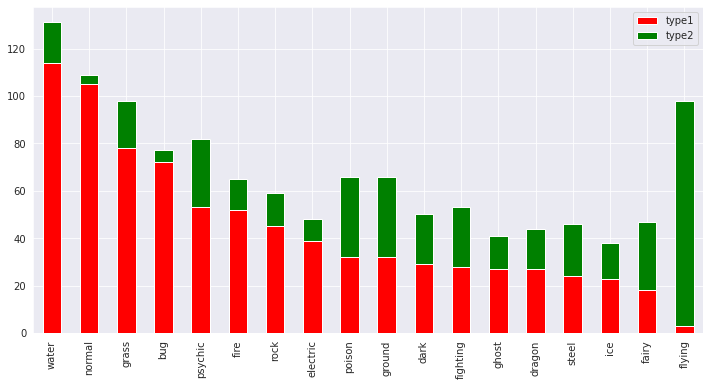

In [20]:
types_df.plot(kind='bar',stacked=True, color=['red', 'green'],figsize=(12,6))

In [21]:
type_top15 = data[~data['type2'].isnull()]["type"].value_counts()[:15]

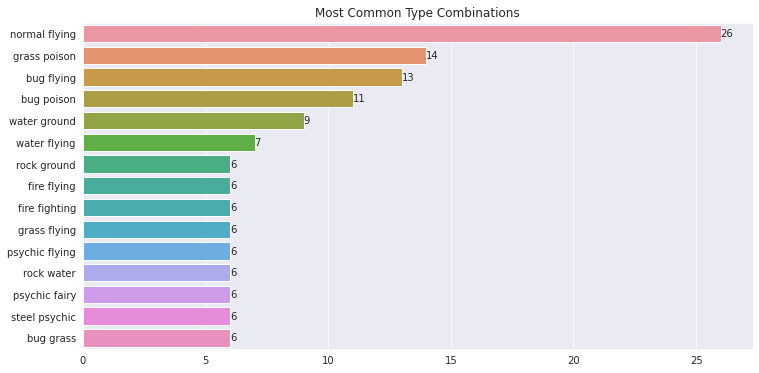

In [22]:
plt.figure(figsize=(12,6))
ax = sns.barplot(y=type_top15.index,x=type_top15.values)
ax.set_title("Most Common Type Combinations")
for container in ax.containers:
    ax.bar_label(container)

## Legendary pokemons

In [23]:
legendary = data[data['is_legendary']==1]
legendary_top1 = legendary['type1'].value_counts().head(5)
legendary_top2 = legendary['type2'].value_counts().head(5)
legendary_top3 = legendary['type'].value_counts().head(5)

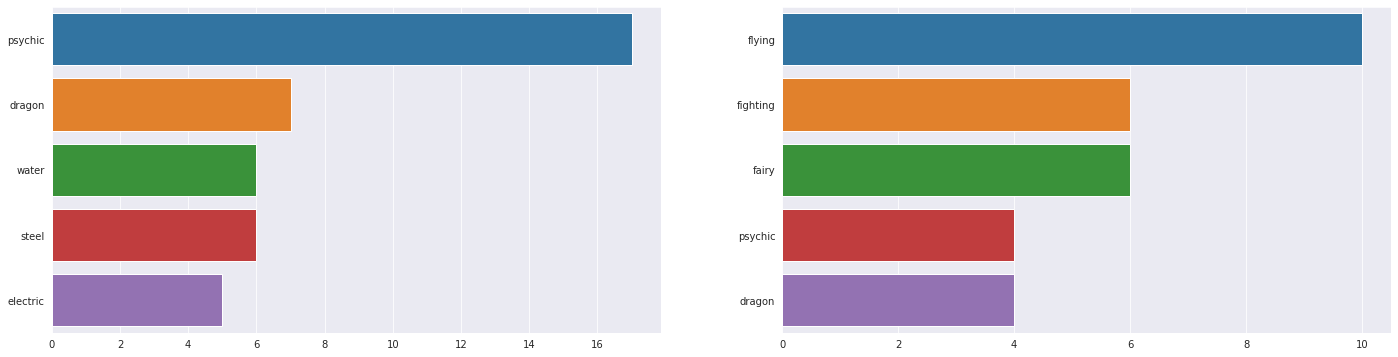

In [24]:
plt.figure(figsize=(24,6))

plt.subplot(1,2,1)
sns.barplot(y=legendary_top1.index,x=legendary_top1.values)

    
plt.subplot(1,2,2)
sns.barplot(y=legendary_top2.index,x=legendary_top2.values)
plt.show()

## Easiest Pokemons to catch

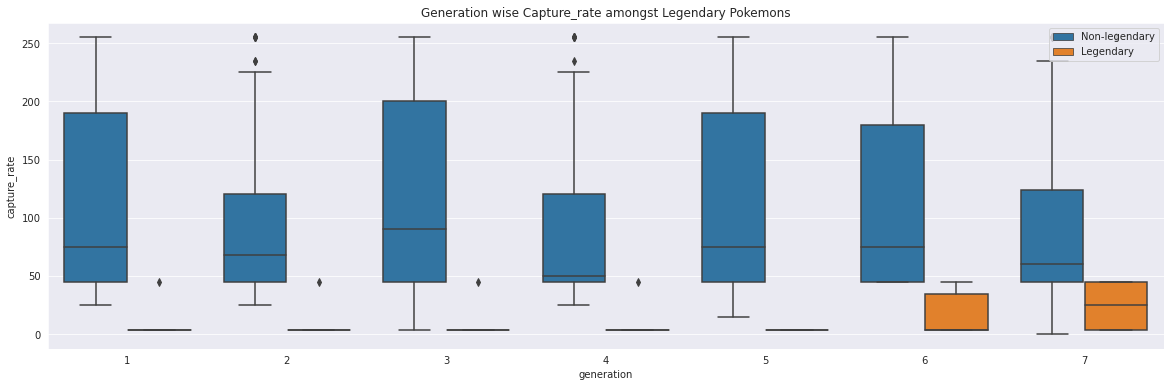

In [25]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='generation',y='capture_rate',hue='is_legendary',data=data)

ax.set_title("Generation wise Capture_rate amongst Legendary Pokemons")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,["Non-legendary", "Legendary"],loc='upper right')

<AxesSubplot:xlabel='type1', ylabel='capture_rate'>

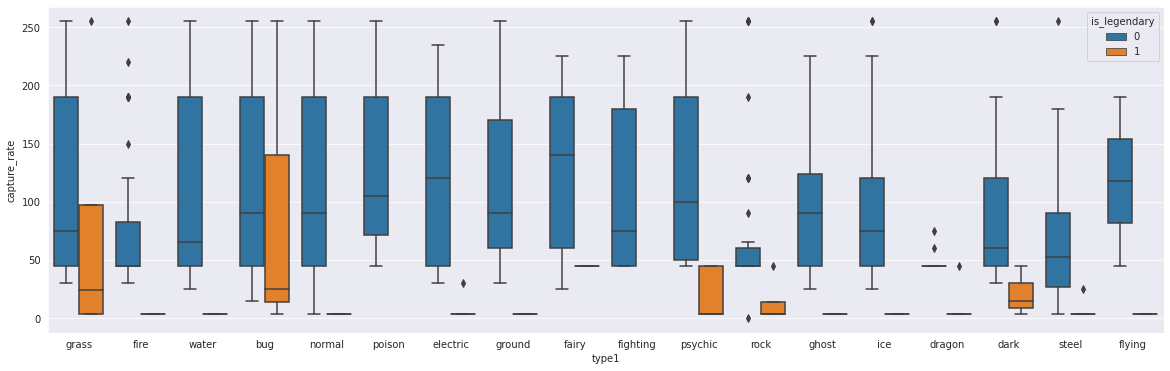

In [26]:
plt.figure(figsize=(20,6))
sns.boxplot(x='type1',y='capture_rate',hue='is_legendary',data=data)

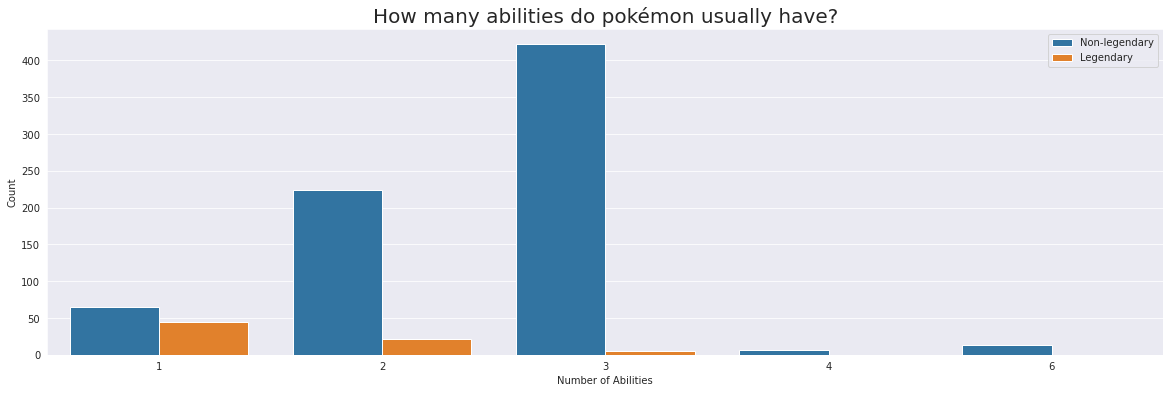

In [26]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data=data, x="n_abilities", hue="is_legendary")
ax.set_title("How many abilities do pokémon usually have?", size=20)
ax.set(xlabel="Number of Abilities", ylabel="Count");
ax.legend(["Non-legendary", "Legendary"], loc='upper right');